In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import special, optimize

In [2]:
data = pd.read_csv('ex2/ex2data2.txt', header=None, names=['x1', 'x2', 'y'])

In [3]:
data

,x1,x2,y
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [4]:
accepted = data[data.y == 1]
rejected = data[data.y == 0]

<IPython.core.display.Javascript object>


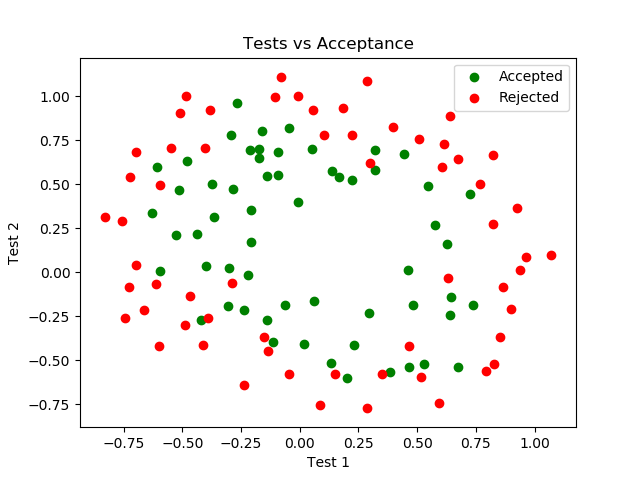

In [5]:
plt.figure(1)
plt.scatter(accepted.x1, accepted.x2, c='g', label='Accepted')
plt.scatter(rejected.x1, rejected.x2, c='r', label='Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.title('Tests vs Acceptance')
plt.show()

In [6]:
Y = data.y
X = pd.DataFrame(np.ones(data.shape[0]), columns=['b'])

In [7]:
for i in range(7):
    for j in range(7-i):
        X['x1^' + str(i) + '|' + 'x2^' + str(j)] = np.power(data.x1, i) * np.power(data.x2, j)
X.drop('b', axis=1, inplace=True)

In [8]:
X

,x1^0|x2^0,x1^0|x2^1,x1^0|x2^2,x1^0|x2^3,x1^0|x2^4,x1^0|x2^5,x1^0|x2^6,x1^1|x2^0,x1^1|x2^1,x1^1|x2^2,...,x1^3|x2^0,x1^3|x2^1,x1^3|x2^2,x1^3|x2^3,x1^4|x2^0,x1^4|x2^1,x1^4|x2^2,x1^5|x2^0,x1^5|x2^1,x1^6|x2^0
0,1.0,0.699560,0.489384,3.423536e-01,2.394969e-01,1.675424e-01,1.172060e-01,0.051267,0.035864,0.025089,...,1.347453e-04,9.426244e-05,6.594223e-05,4.613055e-05,6.907989e-06,4.832553e-06,3.380660e-06,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.684940,0.469143,3.213347e-01,2.200950e-01,1.507518e-01,1.032560e-01,-0.092742,-0.063523,-0.043509,...,-7.976812e-04,-5.463638e-04,-3.742264e-04,-2.563226e-04,7.397855e-05,5.067087e-05,3.470651e-05,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.692250,0.479210,3.317332e-01,2.296423e-01,1.589699e-01,1.100469e-01,-0.213710,-0.147941,-0.102412,...,-9.760555e-03,-6.756745e-03,-4.677356e-03,-3.237900e-03,2.085928e-03,1.443984e-03,9.995978e-04,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.502190,0.252195,1.266497e-01,6.360222e-02,3.194040e-02,1.604015e-02,-0.375000,-0.188321,-0.094573,...,-5.273438e-02,-2.648268e-02,-1.329933e-02,-6.678793e-03,1.977539e-02,9.931003e-03,4.987251e-03,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.465640,0.216821,1.009603e-01,4.701118e-02,2.189028e-02,1.019299e-02,-0.513250,-0.238990,-0.111283,...,-1.352032e-01,-6.295600e-02,-2.931483e-02,-1.365016e-02,6.939303e-02,3.231217e-02,1.504584e-02,-3.561597e-02,-1.658422e-02,1.827990e-02
5,1.0,0.209800,0.044016,9.234565e-03,1.937412e-03,4.064690e-04,8.527719e-05,-0.524770,-0.110097,-0.023098,...,-1.445130e-01,-3.031883e-02,-6.360891e-03,-1.334515e-03,7.583610e-02,1.591041e-02,3.338005e-03,-3.979651e-02,-8.349308e-03,2.088401e-02
6,1.0,0.034357,0.001180,4.055512e-05,1.393352e-06,4.787141e-08,1.644718e-09,-0.398040,-0.013675,-0.000470,...,-6.306380e-02,-2.166683e-03,-7.444073e-05,-2.557560e-06,2.510192e-02,8.624265e-04,2.963039e-05,-9.991567e-03,-3.432803e-04,3.977043e-03
7,1.0,-0.192250,0.036960,-7.105572e-03,1.366046e-03,-2.626224e-04,5.048915e-05,-0.305880,0.058805,-0.011305,...,-2.861892e-02,5.501987e-03,-1.057757e-03,2.033538e-04,8.753955e-03,-1.682948e-03,3.235467e-04,-2.677660e-03,5.147801e-04,8.190426e-04
8,1.0,-0.404240,0.163410,-6.605685e-02,2.670282e-02,-1.079435e-02,4.363507e-03,0.016705,-0.006753,0.002730,...,4.661648e-06,-1.884424e-06,7.617597e-07,-3.079338e-07,7.787282e-08,-3.147931e-08,1.272520e-08,1.300866e-09,-5.258619e-10,2.173096e-11
9,1.0,-0.513890,0.264083,-1.357096e-01,6.973980e-02,-3.583858e-02,1.841709e-02,0.131910,-0.067787,0.034835,...,2.295267e-03,-1.179515e-03,6.061408e-04,-3.114897e-04,3.027686e-04,-1.555898e-04,7.995603e-05,3.993821e-05,-2.052385e-05,5.268249e-06


In [23]:
params = np.zeros(X.shape[1])
m = X.shape[0]
n = X.shape[1] - 1 #Doesn't include vector of 1s
l = 1

def ht(theta):
    return special.expit(np.dot(X, theta))

def cost(theta):
    return (np.dot(Y.T, np.log(ht(theta))) + np.dot(np.transpose(1 - Y), np.log(1 - ht(theta))))/(-m) + (l*(np.sum(np.square(theta)) - np.square(theta[0])))/(2*m)

def jacobian(theta):
    t0 = theta[0]
    thetas = (np.dot(X.T, ht(theta) - Y))/m + theta * l/m
    thetas[0] -= t0/m
    return thetas

cost(params)

0.69314718055994529

In [24]:
res = optimize.fmin_tnc(func=cost, x0=params, fprime=jacobian)

In [25]:
print(res)
params = res[0]

(array([ 1.27271027,  1.18111686, -1.43166929, -0.17516291, -1.19271297,
       -0.45645981, -0.92467487,  0.62529965, -0.91743189, -0.35725403,
       -0.27469165, -0.29539513, -0.14389151, -2.01987399, -0.36553118,
       -0.6155855 , -0.27778953, -0.32742407,  0.12393227, -0.05098418,
       -0.04466178,  0.01555761, -1.4581701 , -0.20603295, -0.29244874,
       -0.2421784 ,  0.02779373, -1.04319156]), 32, 1)


In [26]:
cost(params)

0.52900272996448028

In [27]:
k = ht(params)

correct = 0
for i in range(len(k)):
    if Y[i] == 1:
        if k[i] >= 0.5:
            correct += 1
    elif Y[i] == 0:
        if k[i] < 0.5:
            correct += 1

p = correct/len(k)
print(str(p*100))

83.05084745762711


In [28]:
def calcZ(p, q):
    r = []
    for i in range(len(p)):
        o = []
        for j in range(len(p[i])):
            vec = []
            for t in range(7):
                for s in range(7-t):
                    vec.append(np.power(p[i][j], t) * np.power(q[i][j], s))
            prob = (special.expit(np.dot(vec, params)))
            if prob >= 0.5:
                o.append(1)
            else:
                o.append(0)
        r.append(o)
    return r

<IPython.core.display.Javascript object>


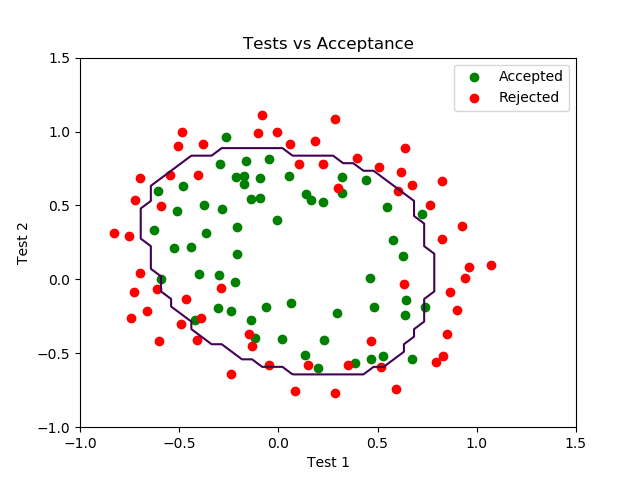

In [29]:
x = np.linspace(-1, 1.5, 50)
y = np.linspace(-1, 1.5, 50)
x,y = np.meshgrid(x, y)
z = calcZ(x, y)

plt.figure(2)
plt.contour(x, y, z, [0])
plt.scatter(accepted.x1, accepted.x2, c='g', label='Accepted')
plt.scatter(rejected.x1, rejected.x2, c='r', label='Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.title('Tests vs Acceptance')
plt.show()